In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
alpha = 0.9
beta = 0.2
gamma = 0.1

Gamma = np.array([[1-gamma, 0, gamma], [0, 1-gamma, gamma], [beta/2, beta/2, 1-beta]])
            


Z_given_C = np.array([1-alpha, alpha, 0.5])

In [4]:
stats.bernoulli(0.5).rvs(size=[2,2])

array([[1, 0],
       [0, 0]])

In [5]:
xk = np.arange(3)
C_transitition = [
        stats.rv_discrete(values=(xk,Gamma[0,])),
        stats.rv_discrete(values=(xk,Gamma[1,])),
        stats.rv_discrete(values=(xk,Gamma[2,])),
    ]

Z_given_C[C_transitition[2].rvs(size=100)]



array([0.5, 0.5, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.1, 0.5, 0.9, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.9, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.1, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.9,
       0.5, 0.5, 0.9, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.1, 0.5, 0.9])

In [6]:
def sim(n=1000, T=1000, alpha = 0.9, beta = 0.2, gamma = 0.1, lamb0=1, lamb1=5):
    #xk = np.arange(3)   
    Gamma = np.array([[1-gamma, 0, gamma], 
                      [0, 1-gamma, gamma], 
                      [beta/2, beta/2, 1-beta]])
    C_transition = [
        stats.rv_discrete(values=(xk,Gamma[0,])),
        stats.rv_discrete(values=(xk,Gamma[1,])),
        stats.rv_discrete(values=(xk,Gamma[2,])),
    ]
    C = np.zeros(T, np.int64)
    C[0] = 2
    for i in range(T-1):
        C[i+1] = C_transition[C[i]].rvs()
    Z_given_C = np.array([1-alpha, alpha, 0.5]) 
    Z = stats.bernoulli(Z_given_C[C]).rvs(size=[n,T])
    X = stats.poisson(np.where(Z, lamb1, lamb0)).rvs()
    return C,Z,X


C, Z, X = sim(10, 100)

<AxesSubplot: >

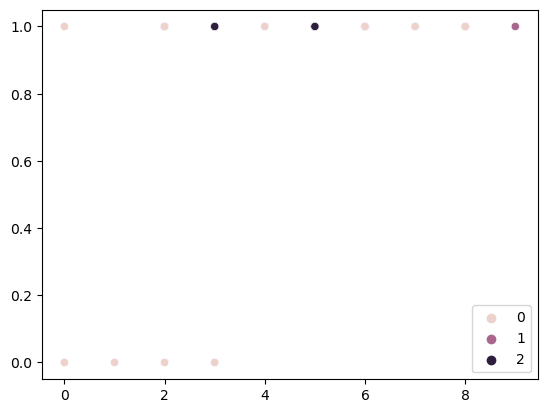

In [79]:
import seaborn as sns
sns.scatterplot(x=X[0],y=Z[0], hue=C)

ValueError: ['blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red'] is not a valid value for color

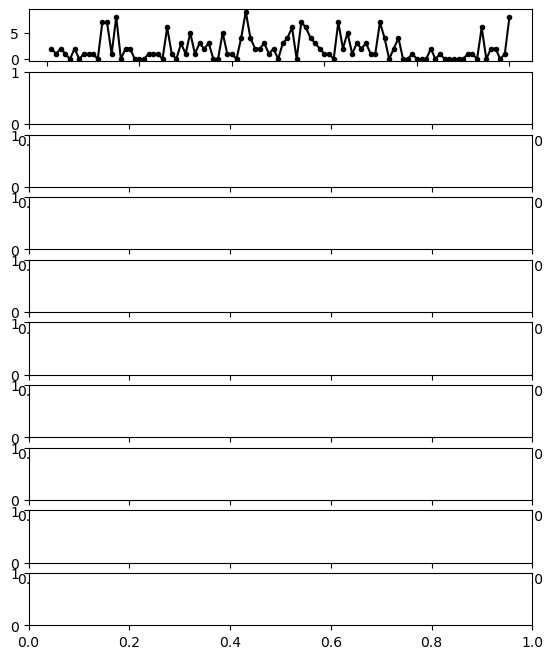

In [70]:
fig, axs = plt.subplots(10, 1, figsize= (6.5, 8))
x_plot = list(range(1,100+1))
col = ("red", "green", "blue")
color_list = [col[i] for i in C]

for i in range(10):
    y_plot = X[i]
    z_plot = Z[i]*10
    axs[i].plot(x_plot, y_plot, marker='o', markersize=3, color='black')
    axs[i].plot(x_plot, z_plot, c=color_list)

fig.suptitle('Generated Data', fontsize=16)
fig.supxlabel('t')
fig.supylabel('X_t')

plt.tight_layout()
plt.legend()
plt.show()

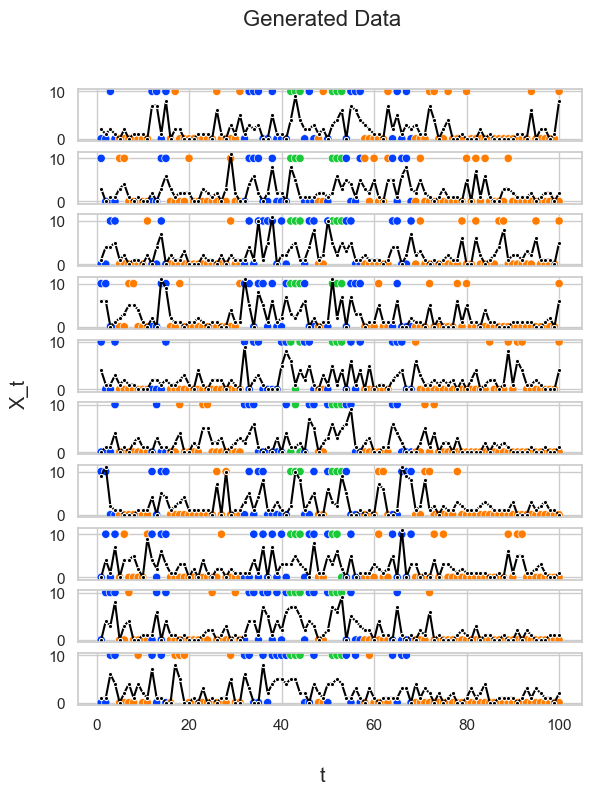

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('bright')


fig, axs = plt.subplots(10, 1, figsize=(6.5, 8))
x_plot = list(range(1, 100+1))
col = ["red", "green", "blue"]
color_list = [col[i] for i in C]

for i in range(10):
    y_plot = X[i]
    z_plot = Z[i] * 10
    sns.lineplot(x=x_plot, y=y_plot, marker='o', markersize=3, color='black', ax=axs[i], legend=False)#, label='X')
    sns.scatterplot(x=x_plot, y=z_plot, marker='o', ax=axs[i], hue=color_list, legend=False)#, label='Z')

fig.suptitle('Generated Data', fontsize=16)
fig.supxlabel('t')
fig.supylabel('X_t')

#plt.tight_layout()
plt.show()
